In [2]:
import re, os, string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
import gensim.models.keyedvectors as word2vec
from sklearn.manifold import TSNE

In [21]:
with open('./datatrain.txt', 'r', encoding='utf-8') as f:
    lines = [line.strip() for line in f.readlines()]
    lines = [line.split() for line in lines if line != '']
    print(lines[:10])

[['danh_sách', 'tác_phẩm', 'doraemon'], ['doraemon', 'nguyên_tác', 'là', 'xê', 'ri', 'anime', 'và', 'manga', 'được', 'sáng_tác', 'bởi', 'fujiko_f'], ['bắt_đầu_từ', 'những', 'chương', 'truyện', 'nhỏ', 'đăng', 'trên', 'tạp_chí', 'tháng', 'corocoro', 'comic', 'sau', 'đó', 'shogakukan', 'tập_hợp', 'lại', 'phát_hành', 'theo', 'cuốn', 'từ', 'tập', '1', 'đến', 'tập', '45'], ['sau', 'đó', 'chuyển_thể', 'thành', 'anime', 'theo', 'ba', 'giai_đoạn', 'phim', 'hoạt_hình', '1973', '1979', '2005', 'và', '2005'], ['năm', '2014', 'viz_media', 'mua', 'bản_quyền', 'mỹ_hóa', 'các', 'yếu_tố', 'trong', 'phim', 'như', 'tên', 'nhân_vật', 'địa_điểm'], ['và', 'phát_sóng', 'trên', 'disney', 'xd', 'kể', 'từ', '7', 'tháng', '7'], ['xê', 'ri', 'cũng', 'được', 'chuyển_thể', 'thành', 'nhiều', 'tác_phẩm', 'khác', 'nhau', 'như', 'doraemon_plus', 'truyện_ngắn', 'truyện_dài', 'phim', 'điện_ảnh', 'trò_chơi', 'điện_tử', 'nhạc_kịch', 'băng_đĩa'], ['dưới', 'đây', 'là', 'danh_sách', 'các', 'tác_phẩm', 'về', 'doraemon', 'được'

In [8]:
len(lines)

306855

In [22]:
model = Word2Vec(lines, vector_size=150, window=5, min_count=2, workers=-1, sg=1)
model.wv.save("model/word2vec_skipgram.model")

In [23]:
model_fasttext = FastText(lines, vector_size=150, window=5, min_count=2, workers=-1, sg=1)
model_fasttext.wv.save("model/fasttext_gensim.model")

# Visualize

In [45]:
model = word2vec.KeyedVectors.load('model/word2vec_skipgram.model')
# model = word2vec.KeyedVectors.load('model/fasttext_gensim.model')

In [41]:
words = ['đàn_ông', 'phụ_nữ', 'hoàng_hậu', 'vua']
words_np = []
words_label = []

for word in model.index_to_key:
    if word in words:
        words_np.append(model[word])
        words_label.append(word)
        
words_np = np.array(words_np)
words_label = np.array(words_label)
print(words_np.shape)
reduced = TSNE(n_components=2, perplexity=min(30, len(words_np)-1)).fit_transform(words_np)

(4, 150)


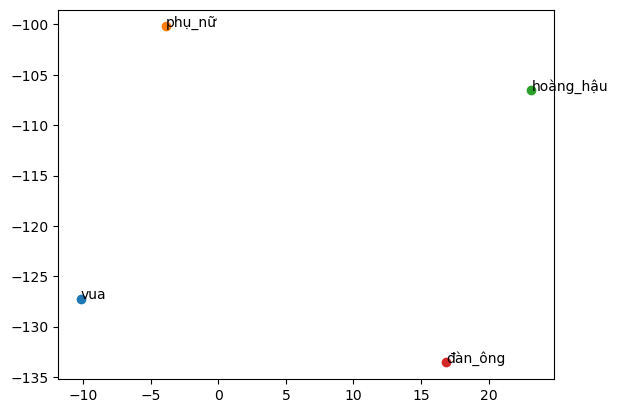

In [42]:
fig, ax = plt.subplots()

for index, vec in enumerate(reduced):
    x, y = vec[0], vec[1]

    ax.scatter(x, y)
    ax.annotate(words_label[index], xy=(x, y))

plt.show()

In [49]:
model = word2vec.KeyedVectors.load('model/word2vec_skipgram.model')
model.most_similar('vui_vẻ', topn=10)

[('yết_hầu', 0.3365514278411865),
 ('hubeicus', 0.32707855105400085),
 ('citronellal', 0.32092663645744324),
 ('lang_shining', 0.3162447512149811),
 ('harry_styles', 0.3115687668323517),
 ('webbiana', 0.3094695508480072),
 ('gaga', 0.30670714378356934),
 ('công_vụ', 0.3000938296318054),
 ('tarentaine', 0.29834315180778503),
 ('1903', 0.2974766790866852)]

In [50]:
model = word2vec.KeyedVectors.load('model/fasttext_gensim.model')
model.most_similar('vui_vẻ', topn=10)

[('vui_đùa', 0.377644419670105),
 ('cái_vẻ', 0.35690513253211975),
 ('sếp', 0.3338512182235718),
 ('vui_tươi', 0.33233949542045593),
 ('ra_vẻ', 0.32872480154037476),
 ('đắk_glei', 0.3228861391544342),
 ('vui_chơi', 0.31301769614219666),
 ('hầu_đốc', 0.31124457716941833),
 ('tiki', 0.31033486127853394),
 ('16cm', 0.3063037395477295)]